<h2 id='part1'>Data description</h2>

I am going to write a blogpost about Stack Overflow annual developer survey results for 2017 as part of Udacity Data Science nanodegree project.

https://insights.stackoverflow.com/survey/2017

'Each year since 2011, Stack Overflow has asked developers about their favorite technologies, coding habits, and work preferences, as well as how they learn, share, and level up. This year represents the largest group of respondents in our history: 64,000 developers took our annual survey in January.'

### CRISP - DM process

CRISP-DM breaks the process of data mining into six major phases (Harper, Gavin; Stephen D. Pickett (August 2006). "Methods for mining HTS data". Drug Discovery Today. 11 (15–16): 694–699.(:

- Business Understanding
- Data Understanding
- Data Preparation
- Modeling
- Evaluation
- Deployment

#### Business understanding

Stackoverflow ('SO') collected and published a poll where it's users answered 154 questions pertaining to their personal and SO related experience. These polls are annual and I am going to analyse 2017 poll.

I'd like to research the following questions pertaining to Women:
- Geography of the respondents
- Percentage of the respondents Male / female ratio
- Then focus on the US
- Profession, MajorUndergrad, YearsProgram, DeveloperType, CareerSatisfaction, JobSatisfaction
- ExCoder (ExCoderReturn, ExCoder10years) questions - very very interesting
- UnderstandComputers
- Their salary and expected salary
- Their experience
- Hiring experience

#### Data understanding

There are two files in the dataset survey_results_public.csv (shape (51392, 154)) and survey_results_schema.csv (shape (154,2)) which should be analyzed. There are seven Numerical columns and 147 Categorical columns.

##### Null data
There are following categorical columns counts where % of missing data per each row is as follows:
- Rows >0.05 is null:  8
- 0.5<Rows<0.75  is null:  37
- Rows >0.75 is null:  14
In other words, there are 51 categorical columns where more than 50% of information is missing

There are following numerical columns counts where % of missing data per each row is as follows:

- Respondent                   0.000000
- CareerSatisfaction           0.169229
- JobSatisfaction              0.214352
- HoursPerWeek                 0.599159
- StackOverflowSatisfaction    0.287983
- Salary                       0.749163
- ExpectedSalary               0.950070

###### Quite high number of columns have null values and it should be taken into account for analysis purposes


Salary has a very high number of missing fields, 75%. This is a pretty important information and it may have a pretty serious effect on analysis.
Respondent has no missing information and basically, it can be treated as an index, as each respondent must had been assigned a specific number by the system. 

In [103]:
# Some commands to make sure the right virtual environment is used
'''from platform import python_version
print(python_version())
!conda env list
!jupyter kernelspec list
'''

'from platform import python_version\nprint(python_version())\n!conda env list\n!jupyter kernelspec list\n'

In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import seaborn as sns
%matplotlib inline

In [416]:

df = pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
print (df.shape)

(51392, 154)


In [39]:
# calculating the number of columns with numerical and categorical data 
print ('Numerical columns: ',len(df._get_numeric_data().columns))
print ('Categorical columns:',(len(df.columns)-len(df._get_numeric_data().columns)))

Numerical columns:  7
Categorical columns: 147


In [40]:
# getting the numerical and categorical df's
df_num = df._get_numeric_data()
print (df_num.shape)

(51392, 7)


In [63]:
df._get_numeric_data().columns

Index(['Respondent', 'CareerSatisfaction', 'JobSatisfaction', 'HoursPerWeek',
       'StackOverflowSatisfaction', 'Salary', 'ExpectedSalary'],
      dtype='object')

In [67]:
# creating a df with categorical data
df_cat = pd.DataFrame()
for columns in df.columns:
    if columns not in  df._get_numeric_data().columns:
        df_cat[columns] = df[columns]
    

In [375]:
df_cat.columns

Index(['Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize', 'CompanyType',
       ...
       'StackOverflowBetter', 'StackOverflowWhatDo', 'StackOverflowMakeMoney',
       'Gender', 'HighestEducationParents', 'Race', 'SurveyLong',
       'QuestionsInteresting', 'QuestionsConfusing', 'InterestedAnswers'],
      dtype='object', length=147)

The results of the below code are described in data understanding part

In [95]:
# percent of null rows per each categorical column
df_cat.isnull().sum()/df_cat.isnull().count()
print ('Rows >0.05 is null: ', np.sum(df_cat.isnull().sum()/df_cat.isnull().count()<0.05))

#number of columns where percent of null rows is more than 50%
print ('0.5<Rows<0.75  is null: ', np.sum((df_cat.isnull().sum()/df_cat.isnull().count()>0.5)&(df_cat.isnull().sum()
                                                                    /df_cat.isnull().count()<0.75)))
#number of columns where percent of null rows is more than 75%
print ('Rows >0.75 is null: ', np.sum(df_cat.isnull().sum()/df_cat.isnull().count()>0.7))


Rows >0.05 is null:  8
0.5<Rows<0.75  is null:  37
Rows >0.75 is null:  14


In [101]:
# percent of null rows per each numerical column
df_num.isnull().sum()/df_num.isnull().count()

Respondent                   0.000000
CareerSatisfaction           0.169229
JobSatisfaction              0.214352
HoursPerWeek                 0.599159
StackOverflowSatisfaction    0.287983
Salary                       0.749163
ExpectedSalary               0.950070
dtype: float64

In [111]:
# lets wrap the above calculation of missing values in the columns to the function
def na_per_col(df, col):
    #calculates the missing values per column (col) in the dataframe (df)'
    return df[col].isnull().sum()/df[col].isnull().count()

In [200]:
# perecnt of na values in Salary column
na_per_col(df, 'Salary')

0.7491632938978829

In [31]:
# What is the schema file?
df_schema = pd.read_csv('survey_results_schema.csv')

In [113]:
# Schema file contains detailed formulation of the quesion
df_schema.head(2)

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?


In [127]:
# Lets create a function returning the question related to the column
def question(df,column):
    return list(df_schema['Question'][df_schema['Column']==column])[0]
    pass

In [133]:
# Question related to Salary column
question(df,'Salary')

'What is your current annual base salary, before taxes, and excluding bonuses, grants, or other compensation?'

#### Data related to women in Gender column

In [130]:
question(df,'Gender')

'Which of the following do you currently identify as?'

Percentage of null in Gender column - 31.8%

In [132]:
na_per_col(df, 'Gender')

0.3180456102117061

Values in gender columns, there are quite a few genders and we will initially focus on Woman gender

In [131]:
df['Gender'].value_counts()

Male                                                       31589
Female                                                      2600
Other                                                        225
Male; Other                                                  171
Gender non-conforming                                        160
Male; Gender non-conforming                                   65
Female; Transgender                                           56
Transgender                                                   55
Female; Gender non-conforming                                 29
Male; Female; Transgender; Gender non-conforming; Other       15
Transgender; Gender non-conforming                            15
Male; Female                                                  15
Male; Transgender                                             11
Female; Transgender; Gender non-conforming                     8
Male; Female; Transgender; Gender non-conforming               7
Male; Female; Transgender

In [520]:
# percentage format for visualization
(df['Gender'].value_counts()/df['Gender'].count()).head()

Male                     0.901332
Female                   0.074186
Other                    0.006420
Male; Other              0.004879
Gender non-conforming    0.004565
Name: Gender, dtype: float64

Ratios of females to all genders and to males

In [142]:
print ('Female to all genders ratio: ',df['Gender'][df['Gender']=='Female'].count()/df['Gender'].count())
print('Female to male ratio :',df['Gender'][df['Gender']=='Female'].count()/df['Gender'][df['Gender']=='Male'].count())

Female to all genders ratio:  0.0741860929608811
Female to male ratio : 0.08230713222957359


In [598]:
# Playing with countplots
#df_gb = df.groupby(['Gender','JobSatisfaction'])['Respondent'].count().unstack()
#sns.barplot(data=df_gb)


In [612]:
#second version of the function which slices a bigger dataset
def countplot2(df1,title,n):
    '''
    df : a column sliced from a dataframe for value_count
    title - the title of the chart
    returns the count plot of each attribute in chosen column
    n - number of columns
    '''
    ratio = df1.value_counts()/df1.count() #df1.shape[0]
    df = pd.DataFrame(pd.Series(ratio)).reset_index()
    df.columns = ['type','ratio']
    print(df.head(min(10,len(ratio))))
    ratio[:min(n,len(ratio))].plot(kind='bar')

    plt.title(title)
    plt.grid(axis='x',linestyle='--')
    plt.ylabel('Percentage')
    plt.xticks(rotation = 40)

#### Function for plotting Male vs Female differences

In [561]:
def male_vs_female(df,col,title):
    '''
    df: a dataframe containing all the data
    col: a column with categorical data
    title: title for the chart where automatically adds  Male minus Female string
    returns the count plot plus title 
    '''
    #lets calculate the ratio of value counts for each gender and then the difference between them
    df_ml = df[col][df['Gender']=='Male'].value_counts()/df[col][df['Gender']=='Male'].count()
    df_fm = df[col][df['Gender']=='Female'].value_counts()/df[col][df['Gender']=='Female'].count()
    ratio = df_ml-df_fm
    df = pd.DataFrame(pd.Series(ratio)).reset_index()
    df.columns = ['rating','delta']
    print(df.head(min(10,len(ratio))))
    ratio[:min(2,len(ratio))].plot(kind='bar')

    plt.title(title+' Male minus Female')
    plt.grid(axis='x',linestyle='--')
    plt.ylabel('Percentage delta')
    plt.xticks(rotation = 40)
    


''

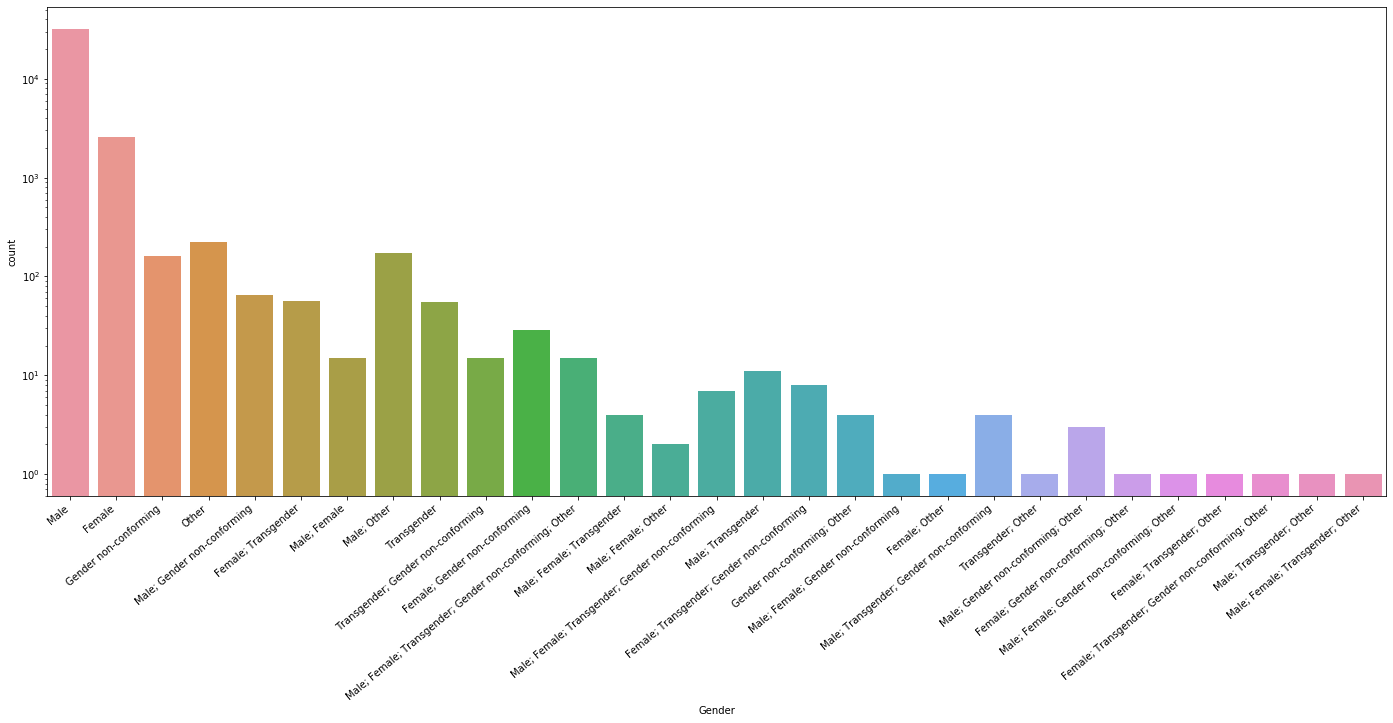

In [661]:
# distribution of genders, log file
plt.figure(figsize=(24, 9))
gr = sns.countplot( data=df['Gender'].value_counts()/df['Gender'].count(),
        x=df['Gender'], log=True );
gr.set_xticklabels(gr.get_xticklabels(), rotation=40, ha="right")
;



In [528]:
df['Gender'].value_counts()/df['Gender'].count()

Male                                                       0.901332
Female                                                     0.074186
Other                                                      0.006420
Male; Other                                                0.004879
Gender non-conforming                                      0.004565
Male; Gender non-conforming                                0.001855
Female; Transgender                                        0.001598
Transgender                                                0.001569
Female; Gender non-conforming                              0.000827
Male; Female; Transgender; Gender non-conforming; Other    0.000428
Transgender; Gender non-conforming                         0.000428
Male; Female                                               0.000428
Male; Transgender                                          0.000314
Female; Transgender; Gender non-conforming                 0.000228
Male; Female; Transgender; Gender non-conforming

                                                type     ratio
0                                               Male  0.901332
1                                             Female  0.074186
2                                              Other  0.006420
3                                        Male; Other  0.004879
4                              Gender non-conforming  0.004565
5                        Male; Gender non-conforming  0.001855
6                                Female; Transgender  0.001598
7                                        Transgender  0.001569
8                      Female; Gender non-conforming  0.000827
9  Male; Female; Transgender; Gender non-conformi...  0.000428


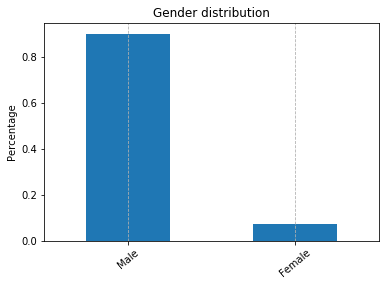

In [614]:
countplot2(df['Gender'],'Gender distribution',2)


Countplot for distribution of males vs females without considering other data

     type     ratio
0    Male  0.923952
1  Female  0.076048


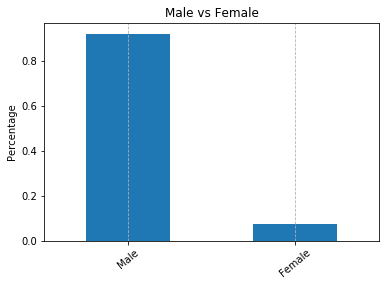

In [615]:
# Percentage distribution of Male only vs Female only
countplot2(df['Gender'][(df['Gender'] =='Male')|(df['Gender']=='Female')],'Male vs Female',2)

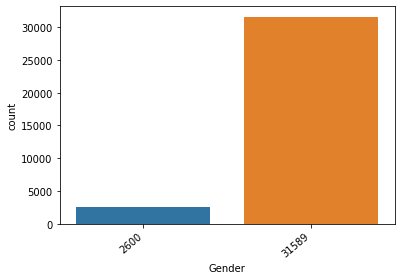

In [254]:
# absolute distribution of Male only vs Female only
gr = sns.countplot(data = df['Gender'][(df['Gender'] =='Male')|(df['Gender']=='Female')].value_counts(), 
        x=df['Gender'][(df['Gender'] =='Male')|(df['Gender']=='Female')] );

gr.set_xticklabels(gr.get_xticklabels(), rotation=40, ha="right");

Calculating the missing values in gender columns

In [199]:
ord_d = df[df['Gender']=='Female'].isnull().sum()/df[df['Gender']=='Female'].isnull().count()
ord_d.sort_values(ascending = False).head()


ExCoderWillNotCode    0.980769
YearsCodedJobPast     0.980385
ExCoderBalance        0.980385
ExCoderBelonged       0.980000
ExCoder10Years        0.980000
dtype: float64

Lets figure the difference in missing values for Males and Females. Missing values may be a good indicator of where the respondent is filling uncomrotable in sharing with information. I calculated the difference in %.
##### For some reason, there are much more nulls in % in Male vs Female answers in MajorUndergrad, HighestEducationParents, CompanySize and CompanyType.

In [212]:
ord_d_Male = df[df['Gender']=='Male'].isnull().sum()/df[df['Gender']=='Male'].isnull().count()
# create new df with perc and absolute values of difference in null values
diff_na = ((ord_d_Male -ord_d)/ord_d_Male).to_frame(name='diff_perc')
diff_na['Male minus Female'] = (df[df['Gender']=='Male'].isnull().sum()-df[df['Gender']=='Female'].isnull().sum()).values
diff_na['Male_nulls']=df[df['Gender']=='Male'].isnull().sum()
diff_na['Female_nulls']=df[df['Gender']=='Female'].isnull().sum()
diff_na['Male_perc']=df[df['Gender']=='Male'].isnull().sum()/df[df['Gender']=='Male'].isnull().count()
diff_na['Female_perc']=df[df['Gender']=='Female'].isnull().sum()/df[df['Gender']=='Female'].isnull().count()



print ('Top missing values % difference, Male over female: ')
diff_na.sort_values(by = ['diff_perc'],ascending = False).head(10)

Top missing values % difference, Male over female: 


,diff_perc,Male minus Female,Male_nulls,Female_nulls,Male_perc,Female_perc
MajorUndergrad,0.558053,4477,4646,169,0.147077,0.065000
HighestEducationParents,0.228596,354,378,24,0.011966,0.009231
CompanySize,0.222065,6578,7028,450,0.222483,0.173077
CompanyType,0.219765,6601,7054,453,0.223306,0.174231
ClickyKeys,0.196720,226,242,16,0.007661,0.006154
JobProfile,0.174061,12531,13445,914,0.425623,0.351538
PronounceGIF,0.152352,40,43,3,0.001361,0.001154
InfluenceWorkstation,0.116222,13270,14311,1041,0.453037,0.400385
InfluenceRecruitment,0.114469,13318,14365,1047,0.454747,0.402692
InfluenceCloud,0.113606,13304,14351,1047,0.454304,0.402692


Now some data where Female had more nulls than Males and also where null values of more than 5%.
There are some noticable results hereincluding:
- Females had much more na in StackoverflowCopiedCode, HaveWorkedPlatform, StackOverFlowModeration.

#### Females did not answer many questions (compared to Males) related to SO Moderation, development of the Platform and how many times the code was copied from StackOverFlow

In [229]:
print ('Bottom missing values % difference, Male over female: ')
#selecting Females over Males (negatives) and those more than 5%
diff_na[diff_na['Male_perc']>0.05].sort_values(by = ['diff_perc'], ascending = True, na_position = 'last').head(10)

Bottom missing values % difference, Male over female: 


,diff_perc,Male minus Female,Male_nulls,Female_nulls,Male_perc,Female_perc
StackOverflowBetter,-0.408747,1624,1837,213,0.058153,0.081923
StackOverflowCopiedCode,-0.402722,1471,1663,192,0.052645,0.073846
HaveWorkedPlatform,-0.387242,5741,6481,740,0.205166,0.284615
StackOverflowNewQuestion,-0.354176,1706,1920,214,0.060781,0.082308
StackOverflowJobSearch,-0.328049,1866,2095,229,0.066321,0.088077
StackOverflowModeration,-0.326497,4357,4891,534,0.154832,0.205385
StackOverflowAdsRelevant,-0.321408,3835,4303,468,0.136218,0.180000
StackOverflowAnswer,-0.314468,1764,1978,214,0.062617,0.082308
StackOverflowWhatDo,-0.296804,1883,2108,225,0.066732,0.086538
StackOverflowHelpful,-0.295557,1441,1613,172,0.051062,0.066154


In [532]:
question(df_schema,'StackOverflowBetter')

'Stack Overflow makes the Internet a better place'

In [228]:
question(df_schema,'StackOverflowModeration')

'The moderation on Stack Overflow is unfair'

In [224]:
#what is the HaveWorkedPlatform?
question(df_schema,'HaveWorkedPlatform')

'Which of the following platforms have you done extensive development work for over the past year, and which do you want to work on over the next year?'

In [226]:
question(df_schema,'StackOverflowCopiedCode')

'Over the last three months, approximately how often have you done each of the following on Stack Overflow? Copied a code example and pasted it into my codebase'

#### Males compared to females did not answer more questions than females on the following

In [534]:
diff_na[diff_na['Male_perc']>0.05].sort_values(by = ['diff_perc'],ascending = False).head(10)

,diff_perc,Male minus Female,Male_nulls,Female_nulls,Male_perc,Female_perc
MajorUndergrad,0.558053,4477,4646,169,0.147077,0.065000
CompanySize,0.222065,6578,7028,450,0.222483,0.173077
CompanyType,0.219765,6601,7054,453,0.223306,0.174231
JobProfile,0.174061,12531,13445,914,0.425623,0.351538
InfluenceWorkstation,0.116222,13270,14311,1041,0.453037,0.400385
InfluenceRecruitment,0.114469,13318,14365,1047,0.454747,0.402692
InfluenceCloud,0.113606,13304,14351,1047,0.454304,0.402692
InfluenceCommunication,0.113500,13315,14363,1048,0.454684,0.403077
InfluenceServers,0.112283,13308,14357,1049,0.454494,0.403462
InfluenceHardware,0.111604,13259,14305,1046,0.452848,0.402308


In [535]:
question(df_schema,'MajorUndergrad')

"Which of the following best describes your main field of study (aka 'major') in college or university/for your undergraduate studies?"

In [536]:
question(df_schema,'CompanySize')

'In terms of the number of employees, how large is the company or organization you work for?'

In [537]:
question(df_schema,'CompanyType')

'Which of the following best describes the type of company or organization you work for?'

### List of issues for women are in technology domain

In [419]:
# will create dataframes to focus on Females only and Males only without collecing info on other genders
df_female = df[df['Gender']=='Female']
df_male = df[df['Gender']=='Male']


In [425]:
len(df_female['JobSatisfaction'])

2600

In [421]:
df_male.shape

(31589, 154)

In [314]:
question(df, 'JobSatisfaction')

'Job satisfaction rating'

   type     ratio
0   8.0  0.213615
1   7.0  0.193427
2   9.0  0.151643
3   6.0  0.117840
4  10.0  0.096244
5   5.0  0.092958
6   4.0  0.048826
7   3.0  0.041784
8   2.0  0.021596
9   0.0  0.011268


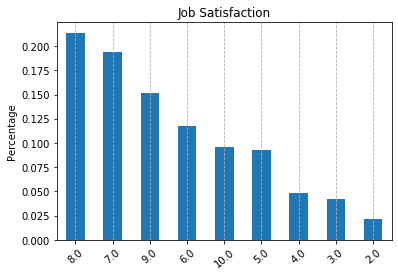

In [616]:
countplot2(df_female['JobSatisfaction'],'Job Satisfaction',2)

   type     ratio
0   8.0  0.229567
1   7.0  0.200639
2   9.0  0.145784
3   6.0  0.116133
4  10.0  0.097240
5   5.0  0.087014
6   4.0  0.044439
7   3.0  0.039117
8   2.0  0.021782
9   0.0  0.009922


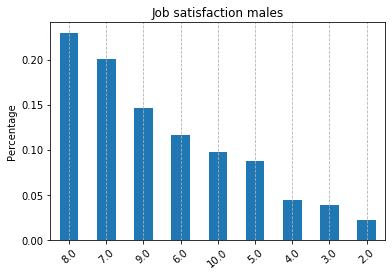

In [617]:
countplot2(df_male['JobSatisfaction'],'Job satisfaction males',2)

In [548]:
#Old code for job satisfaction
'''df_jobsat = pd.DataFrame()
df_jobsat['Male'] = df_male['JobSatisfaction'].value_counts()/df_male['JobSatisfaction'].count()
df_jobsat['Female']=pd.DataFrame(df_female['JobSatisfaction'].value_counts()/df_female['JobSatisfaction'].count())

df_jobsat['MaleoverFemale']=pd.DataFrame(df_male['JobSatisfaction'].value_counts()/df_male['JobSatisfaction'].count())-pd.DataFrame(df_female['JobSatisfaction'].value_counts()/df_female['JobSatisfaction'].count())
'''

"df_jobsat = pd.DataFrame()\ndf_jobsat['Male'] = df_male['JobSatisfaction'].value_counts()/df_male['JobSatisfaction'].count()\ndf_jobsat['Female']=pd.DataFrame(df_female['JobSatisfaction'].value_counts()/df_female['JobSatisfaction'].count())\n\ndf_jobsat['MaleoverFemale']=pd.DataFrame(df_male['JobSatisfaction'].value_counts()/df_male['JobSatisfaction'].count())-pd.DataFrame(df_female['JobSatisfaction'].value_counts()/df_female['JobSatisfaction'].count())\n"

#### Job satisfaction differences
Males seem to be more satisfied than females in general, as they selected less ratings of 0 to 6 than females and selected more 7 and 8 and 10 ratings. However, the differences are not significant.

<BarContainer object of 11 artists>

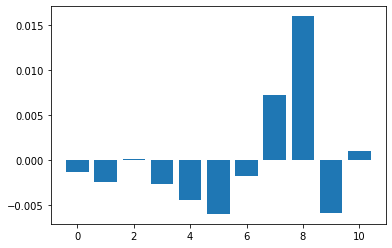

In [372]:
# Difference between the male and female job satisfaction.
plt.bar(x=df_jobsat.index, data = df_jobsat['MaleoverFemale'], height=df_jobsat['MaleoverFemale'])

   rating    delta%
0     8.0  0.015952
1     7.0  0.007211
2     9.0 -0.005859
3     6.0 -0.001707
4    10.0  0.000996
5     5.0 -0.005943
6     4.0 -0.004388
7     3.0 -0.002667
8     2.0  0.000186
9     0.0 -0.001346


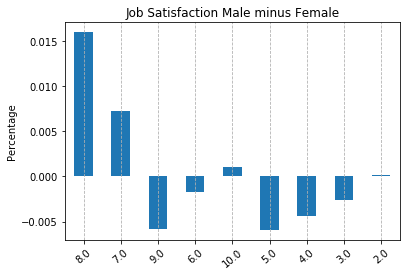

In [560]:
male_vs_female(df,'JobSatisfaction','Job Satisfaction')

#### Average job satisfaction for Males and Females

In [557]:
df['JobSatisfaction'][df['Gender']=='Male'].sum()/df['JobSatisfaction'][df['Gender']=='Male'].count()

7.004371626244963

In [558]:
df['JobSatisfaction'][df['Gender']=='Female'].sum()/df['JobSatisfaction'][df['Gender']=='Female'].count()

6.936619718309859

In [377]:
question(df,'CareerSatisfaction')

'Career satisfaction rating'

   type     ratio
0   8.0  0.253017
1   7.0  0.228878
2   9.0  0.135449
3   6.0  0.115333
4  10.0  0.099687
5   5.0  0.075548
6   4.0  0.039338
7   3.0  0.028163
8   2.0  0.012517
9   1.0  0.006258


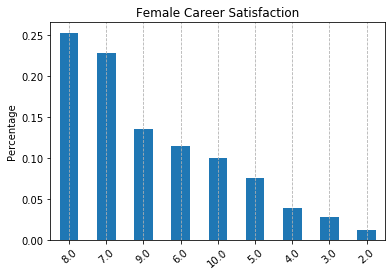

In [618]:
countplot2(df_female['CareerSatisfaction'],'Female Career Satisfaction',2)

   type     ratio
0   8.0  0.273294
1   7.0  0.223479
2   9.0  0.139729
3  10.0  0.122507
4   6.0  0.107498
5   5.0  0.062795
6   4.0  0.027337
7   3.0  0.022950
8   2.0  0.010152
9   0.0  0.006997


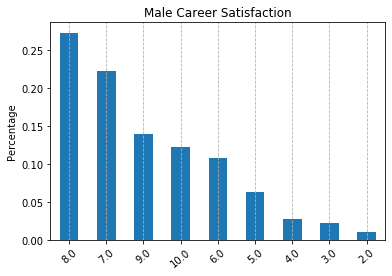

In [619]:
countplot2(df_male['CareerSatisfaction'],'Male Career Satisfaction',2)

   rating     delta
0     0.0  0.001186
1     1.0 -0.002995
2     2.0 -0.002365
3     3.0 -0.005213
4     4.0 -0.012002
5     5.0 -0.012753
6     6.0 -0.007835
7     7.0 -0.005399
8     8.0  0.020277
9     9.0  0.004280


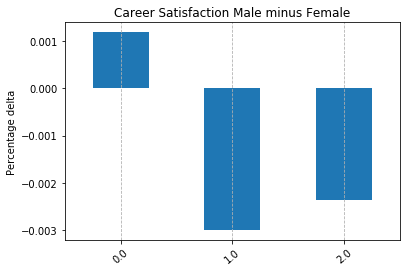

In [562]:
male_vs_female(df,'CareerSatisfaction', 'Career Satisfaction')

             type     ratio
0   United States  0.325769
1           India  0.088462
2  United Kingdom  0.085000
3         Germany  0.058846
4          Canada  0.057692
5          Poland  0.037692
6          France  0.024615
7           Spain  0.015769
8       Australia  0.015385
9          Israel  0.015385


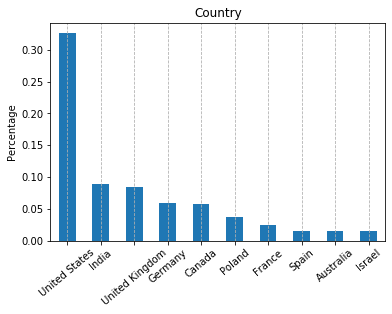

In [620]:
countplot2(df_female['Country'],'Country',10)

### Salary related information

In [668]:
# Creating five bins for salary distribution
df['Salary_bin']=pd.cut(df['Salary'],5)

In [634]:
df['Salary_bin'].head()

0                    NaN
1                    NaN
2    (78800.0, 118200.0]
3                    NaN
4                    NaN
Name: Salary_bin, dtype: category
Categories (5, interval[float64]): [(-197.0, 39400.0] < (39400.0, 78800.0] < (78800.0, 118200.0] < (118200.0, 157600.0] < (157600.0, 197000.0]]

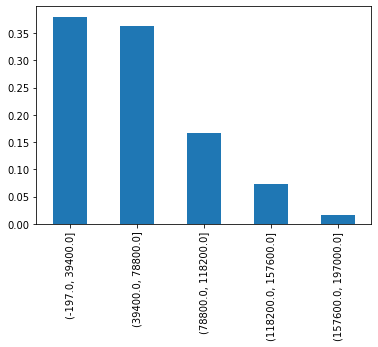

In [667]:
#Plotting the salary data
ratio = df['Salary_bin'].value_counts()/df['Salary_bin'].count() #df1.shape[0]
ratio.plot(kind='bar')

### Plotting the salary information according to the bins and gender

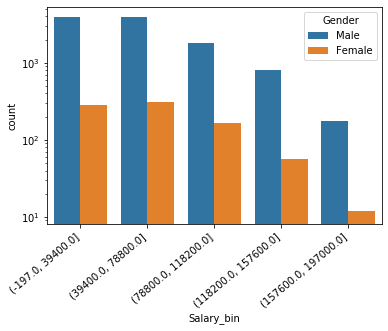

In [676]:
sal =sns.countplot(data = df[(df['Gender']=='Male')|(df['Gender']=='Female')], 
                   x= 'Salary_bin', hue='Gender', 
                   log=True
                  );
sal.set_xticklabels(sal.get_xticklabels(), rotation=40, ha="right");


### Difference in female and male salary bins

In [682]:
#calculating percent difference in salary bins distribution between males and females
df_female['Salary_bin']= df['Salary_bin'][df['Gender']=='Female']
df_male['Salary_bin']= df['Salary_bin'][df['Gender']=='Male']
    
df_male['Salary_bin'].value_counts()/df_male['Salary_bin'].count()-df_female['Salary_bin'].value_counts()/df_female['Salary_bin'].count()

/Users/azizmamatov/anaconda/envs/uda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/azizmamatov/anaconda/envs/uda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(39400.0, 78800.0]     -0.003480
(-197.0, 39400.0]       0.028549
(78800.0, 118200.0]    -0.032984
(118200.0, 157600.0]    0.006254
(157600.0, 197000.0]    0.001662
Name: Salary_bin, dtype: float64

In [673]:
df['Salary_bin'][(df['Gender']=='Male')|(df['Gender']=='Female')].value_counts()/df['Salary_bin'][(df['Gender']=='Male')|(df['Gender']=='Female')].count()

(39400.0, 78800.0]      0.371615
(-197.0, 39400.0]       0.368394
(78800.0, 118200.0]     0.169613
(118200.0, 157600.0]    0.074184
(157600.0, 197000.0]    0.016195
Name: Salary_bin, dtype: float64